### <p style="text-align: right;"> &#9989; **Haoyan Lin** </p>
#### <p style="text-align: right;"> &#9989; Larissa Ford, Thanh lai, Connor Kromp, Dongdong Li</p>

# Day 10 In-class Assignment: Graph Theory and Cell Towers


In this assignment you will work with your group to develop a program to use a color graphing algorithm to select frequencies for cell towers around MSU.  There are four major parts to this assignment.  Try to make sure you get through all of it, but don't stress too much if you don't finish.

### Agenda for today's class:

1. Part 1: Download and import the data
2. Part 2: K-nearest neighbor graph
3. Part 3: Greedy graph coloring
4. Part 4: Plotting towers and their colors on a map

---
# Problem Statement

The signals from different cellphone towers that are close together can interfere.  

<img src="http://2.bp.blogspot.com/-X7XJfnPb6xU/TjZfTmAd9CI/AAAAAAAAAF0/3eGarXigOQE/s1600/dido1.jpg" width="500px"><p style="text-align: right;">From: http://www.onlivespot.com/2011/08/dido-wireless-technology-explained.html</p>

In order to avoid this overlap cell phone companies use different frequency ranges in the Electromagnetic spectrum.  Two towers that are close together but have differences in frequencies (shown as colors, red/green/black in the following figure) do not cause nearly as much interference. 

<img src="http://2.bp.blogspot.com/-M4olRy6O-v4/TjZghvwq3KI/AAAAAAAAAF4/GtOd6Db-su4/s1600/dido2.jpg" width = "500px"><p style="text-align: right;">From:  http://www.onlivespot.com/2011/08/dido-wireless-technology-explained.html</p>

However, cellphone towers are never distributed in such an even pattern.   Consider the following map which shows the location of cell towers around Michigan State.

<img src='./images/MSU_Towers.jpg' width = "500px">
<p style="text-align: right;">From: http://www.antennasearch.com/</p>

Another problem is that cellphone companies have to pay for each frequency range they use.  So they would like minimize the number of frequencies that they need to purchase while also minimizing the interference between the cell towers. 

In this assignment you are going to work as a group to solve this problem using graph coloring.

---
## Part 1: Download and import the data

We will be using antenna data from the following website:

http://www.antennasearch.com/

Figure out how to download a csv file from the above website for all of the towers in a 2.0 Mile radius from the MSU engineering building (428 S Shaw Lane, East Lansing, MI 48824). Make sure that the downloaded file is in the same directory as your in-class notebook.

Write a function to load the file into Python and generate a list of latitude and longitude for the towers.

In [26]:
# Put your function here!
import numpy as np
latitude, longitude = np.loadtxt("TowersVNZ476413FDC428783.csv", usecols = (3,4), unpack=True, skiprows = 1, delimiter=',')
lat = latitude.tolist()
lon = longitude.tolist()
print(lat, lon)
type(lat)

[42.6963888888889, 42.7547222222222, 42.6758333333333, 42.7624722222222, 42.7283333333333, 42.7396388888889, 42.7164166666667, 42.7261111111111, 42.7202777777778, 42.6800555555556, 42.78275, 42.7315, 42.7216666666667, 42.7485, 42.68875, 42.7279722222222, 42.7227222222222, 42.7432777777778, 42.7066944444444, 42.6779722222222, 42.6808611111111, 42.75475, 42.7436111111111, 42.7058333333333, 42.6899166666667, 42.6711388888889, 42.6777777777778, 42.6876388888889, 42.7433611111111, 42.73725, 42.7266944444444, 42.7428055555556, 42.7303055555556, 42.73425, 42.7397777777778, 42.7228055555556, 42.7069722222222, 42.7458611111111, 42.7203055555556, 42.7491944444444, 42.7658611111111, 42.7733611111111, 42.6941666666667, 42.6755833333333, 42.6858611111111, 42.73425, 42.7114166666667, 42.6871388888889, 42.77275, 42.6863611111111, 42.7355833333333, 42.6855833333333] [-84.5255555555556, -84.5255555555556, -84.5, -84.5205277777778, -84.515, -84.5119166666667, -84.4824166666667, -84.4947222222222, -84.51

list

Generate a plot similar to the following showing the towers on the x-y plane.

<img src="https://i.imgur.com/Y2KiyKU.png">


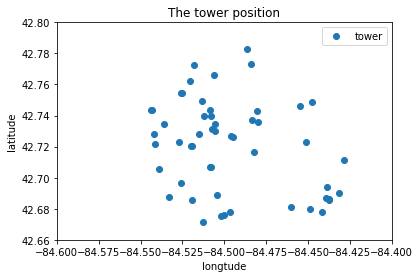

In [48]:
# Put your plotting code here.
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(longitude,latitude, 'o', label = "tower")
plt.xlabel("longtude")
plt.ylabel("latitude")    
plt.title("The tower position")
plt.legend()
plt.xlim([-84.60,-84.40])
plt.ylim([42.66,42.80])
plt.savefig('tower.pdf')


**Question:** By default `matplotlib.pyplot.scatter` will scale the x-axis and y-axes to best fit the points. However, sometimes (as is the case here) we want the scaling of both axes to be equal.  What command can you use for the above plot to ensure that the distances are the same in the x-direction as the y-direction?

<font size=8 color="#009600">&#9998;</font> 
set figure size through "xlim and ylim"

---
## Part 2: K - Nearest Neighbor Graph
Next **write a function that generates a graph using the k-nearest neighbor graph algorithm**.  More information about the algorithm can be found here:

https://en.wikipedia.org/wiki/Nearest_neighbor_graph

The K-NN graph is very similar to the nearest neighbor graph you did in the pre-class assignment. However, now instead of only finding the closest point to each point you find the k-closest points. If you think it would be useful, you can use your nearest-neighbor solution from the pre-class assignment as a starting point. A nearest-neighbor solution has also been provided below. Of course, you may also find it easiest just to start from scratch.

**Make a graph similar to the following when you complete your algorithm**.

<img src="https://i.imgur.com/kFHYPpK.png">  

In [108]:
# Possible solution for the nearest-neighbor algorithm
import math
def distance(p1,p2):
    '''Returns the distance betwen two numpy points'''
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    
def nn_graph(points):
    '''Generates an adjacency matrix based on the Nearest neighbor graph algorithm.'''
    G = dict()
    for p in range(0,len(points)):
        min_distance = np.inf;
        min_point = -1
        for n in range(0,len(points)):
            if p != n:
                d = distance(points[p], points[n])
                if d < min_distance:
                    min_distance = d
                    min_point = n
        if min_point == -1:
            print("ERROR-point not found")
        G[p] = min_point
    return G

In [115]:
# Put your k-nn function here
import numpy as np
import networkx as nx
points= []
points['A'] = ['B']

for i in range(len(latitude)-1):
    points.append([latitude[i],longitude[i]])
    
dic ={}
points['A'] = ['B']

G = nx.Graph(points)
pos=nx.spring_layout(G)
nx.draw_networkx(G,with_labels= False, node_size = 50,font_size=8)

plt.figure(2,figsize=(6,6)) 
nx.draw(G,pos)
plt.show()

TypeError: list indices must be integers or slices, not str

**&#9989; Do This:**  It is important to test code.  How do you know if your K-NN algorithm is working? Trying writing a function that tests if your code is right. Try changing the inputs and the values for ```k``` and make sure it behaves correctly.

In [ ]:
# Put some testing code here


**&#9989; Do This:** Now generate a figure similar to the above using the tower locations from Part 1.

In [ ]:
# Put the code that makes your cell tower plot here


---
## Part 3: Greedy Graph Coloring

Next we will run a greedy graph coloring algorithm on your K-NN graph with k = 3.  Plot the towers in the x-y plane colored to match the frequency selected. For example:

<img src="https://i.imgur.com/a0J0Izs.png">

**&#9989; Do This:** Find (or make) a graph coloring function and test it to make sure it is working. 

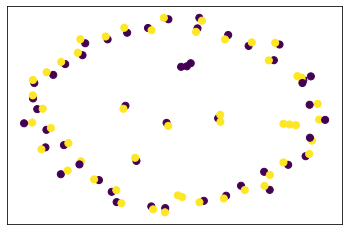

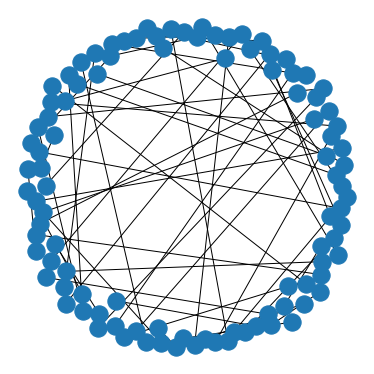

In [99]:
# Put your graph coloring tests here.
D = nx.coloring.greedy_color(G)
pos=nx.spring_layout(D)
colors = []
for key in D.keys():
    colors.append(D[key])
    
nx.draw_networkx(G, with_labels = False, node_color = np.array(colors), node_size=50)

plt.figure(3,figsize=(5,5)) 
nx.draw(G,pos)
plt.show()

**&#9989; Do This:** Apply the graph coloring algorithm to the K-NN graph (K=3) developed in part 2 of the tower data downloaded in part 1.  

In [ ]:
# Plot your colored cell tower graph here.


---
## Part 4: Plot tower colors on a map
Finally plot the towers on a map and set the marker colors to your individual frequency colors. Something like the following:

<img src="https://i.imgur.com/OVhIIlO.jpg" width="500px">

**Note**: In order to overlay the tower locations as points on map, you'll like need to find a python package that can help you do this. We explored some such options in a previous class period!

**&#9989; Do This:** First, write some test code to generate a map with colored points using whatever package you chose to use.

In [ ]:
#Put your test code here


**&#9989; Do This:** Finally, put it all together.  Generate a map with markers colored based on the frequencies selected in the graph coloring algorithm in part 3.  Use the K-NN graph with ```k=3``` generated from part 2 of the tower data downloaded from part 1. 

In [ ]:
# Put your map code here


----

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your name in the first cell).

&#169; Copyright 2018,  Michigan State University Board of Trustees